## Import libraries and Tools

In [7]:
!pip install opencv-python

In [2]:
import os,shutil

In [9]:
import numpy as np

In [6]:
import random
from PIL import Image, ImageEnhance

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mping
import seaborn as sns
%matplotlib inline


In [9]:
plt.style.use('ggplot')

In [10]:
from sklearn.utils import shuffle

## Load Datasets

In [11]:
#Dataset
import zipfile
z=zipfile.ZipFile('archive.zip')
z.extractall()

In [17]:
#changing file name of yes folder to y_1,y_2....
import os

folder = "brain_tumor_dataset/yes/"

count = 1

for filename in os.listdir(folder):
    if filename.endswith(".jpg"):

        old_path = os.path.join(folder, filename)

        # find next available name
        while True:
            new_name = f"Y_{count}.jpg"
            new_path = os.path.join(folder, new_name)

            if not os.path.exists(new_path):
                break
            count += 1

        os.rename(old_path, new_path)
        count += 1

print("All files are safely renamed!")


All files are safely renamed!


In [20]:
#changing file name of no folder to y_1,y_2....
folder='brain_tumor_dataset/no/'
count=1

for filename in os.listdir(folder):
    source=folder + filename
    destination = folder + "N_" +str(count)+".jpg"
    os.rename(source,destination)
    count+=1
print("All files are renamed in the no directory")

All files are renamed in the no directory


## Data Visualization

In [ ]:
#EDA(Exploratory Data Analysis)

In [21]:
listyes=os.listdir("brain_tumor_dataset/yes/")
number_files_yes=len(listyes)
print(number_files_yes)

465


In [19]:
listno=os.listdir("brain_tumor_dataset/no/")
number_files_no=len(listno)
print(number_files_no)

294


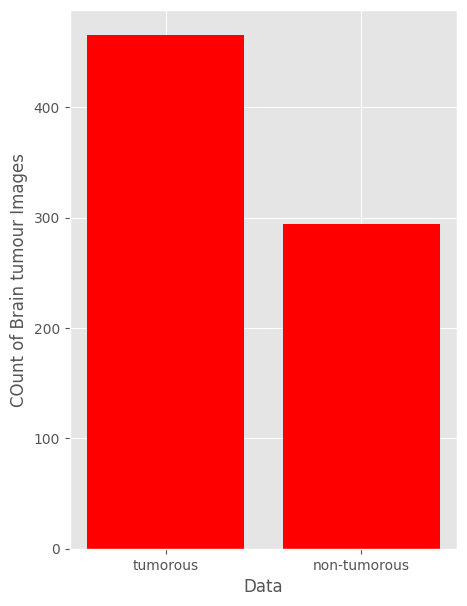

In [20]:
data={'tumorous':number_files_yes, 'non-tumorous':number_files_no}

typex=data.keys()
values=data.values()

fig=plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No. of Brain tumour Images")
plt.ylabel("COunt of Brain tumour Images")
plt.show()

In [17]:
#since we have less amount of data and for increasing the number of data we use " Dara Argumentation in DL"

In [18]:
#Data Augumentation
# 155(61%)- for yes ,98(39%)->for no


In [22]:
!pip install tensorflow

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

C:\Users\akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Image Preprocessing(Helper Function)

#formual of reshaping
"brain_tumor_dataset/yes/"
N,WIDTH,HEIGHT,CHANNEL
N=number of images

In [24]:
def timing(sec_elapsed):
    h=int(sec_elapsed / (60*60))
    m=int(sec_elapsed % (60*60) / 60)
    s=sec_elapsed % 60

    return f"{h}:{m}:{s}"

In [25]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augmented_data(file_dir, total_samples, save_to_dir):
    data_gen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        fill_mode='nearest'
    )

    total_count = 0

    for filename in os.listdir(file_dir):
        if total_count >= total_samples:
            break

        image = cv2.imread(os.path.join(file_dir, filename))
        image = image.reshape((1,) + image.shape)

        save_prefix = 'aug_' + filename[:-4]

        for batch in data_gen.flow(
            x=image,
            batch_size=1,
            save_to_dir=save_to_dir,
            save_prefix=save_prefix,
            save_format="jpg"
        ):
            total_count += 1
            if total_count >= total_samples:
                break


import time
start_time=time.time()
yes_path='brain_tumor_dataset/yes'
no_path='brain_tumor_dataset/no'

augmented_data_path='augmented_data/'

augmented_data(file_dir= yes_path,n_generated_samples=2,save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir= no_path,n_generated_samples=3,save_to_dir=augmented_data_path+'no')

end_time=time.time()
execution_time=end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

In [26]:
import time
start_time=time.time()
yes_path='brain_tumor_dataset/yes'
no_path='brain_tumor_dataset/no'

augmented_data_path='augmented_data/'
augmented_data(yes_path, total_samples=700, save_to_dir='augmented_data/yes')
augmented_data(no_path, total_samples=700, save_to_dir='augmented_data/no')

end_time=time.time()
execution_time=end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


Execution time: 145.42 seconds


In [27]:
def data_summary(main_path):
    yes_path="augmented_data/yes/"
    no_path="augmented_data/no/"
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    n = (n_pos + n_neg)

    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n

    print(f"Number of samples {n}")
    print(f"{n_pos} Number of positive samples in percentage: {pos_per}%")
    print(f"{n_neg} Number of positive samples in percentage: {neg_per}%")

In [29]:
data_summary(augmented_data_path)

Number of samples 14397
5660 Number of positive samples in percentage: 39.31374591928874%
8737 Number of positive samples in percentage: 60.68625408071126%


## Data Preproccessing

In [30]:
listyes=os.listdir("augmented_data/yes/")
number_files_yes=len(listyes)
print(number_files_yes)

listno=os.listdir("augmented_data/no/")
number_files_no=len(listno)
print(number_files_no)

5660
8737


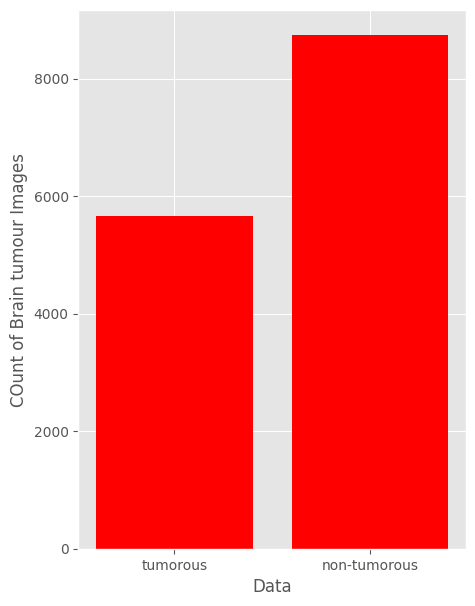

In [31]:
data={'tumorous':number_files_yes, 'non-tumorous':number_files_no}

typex=data.keys()
values=data.values()

fig=plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No. of Brain tumour Images")
plt.ylabel("COunt of Brain tumour Images")
plt.show()

# DataPreproccessing
convert BGR to GRAY
GaussianBlur
Threshold
Erode
Dilate
Find Contours

In [32]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [33]:
import imutils

In [34]:
import cv2
import imutils
import matplotlib.pyplot as plt

def crop_brain_tumor(image, plot=False):
    # Convert to grayscale and blur
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    # Threshold and morphological operations
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    # Find contours
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Find extreme points
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])

    # Crop the image
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    # Plot images if needed
    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')

        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image



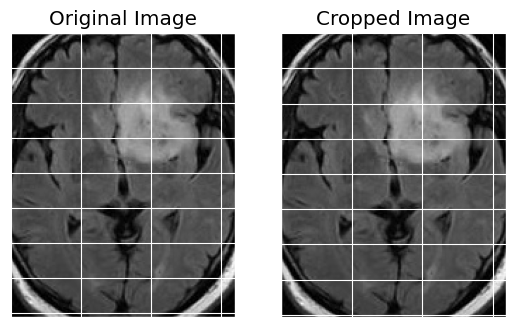

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [2, 2, 2]],

       ...,

       [[0, 0, 0],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], shape=(202, 160, 3), dtype=uint8)

In [35]:
img = cv2.imread('augmented_data/yes/aug_Y_138_0_1914.jpg')
crop_brain_tumor(img,True)

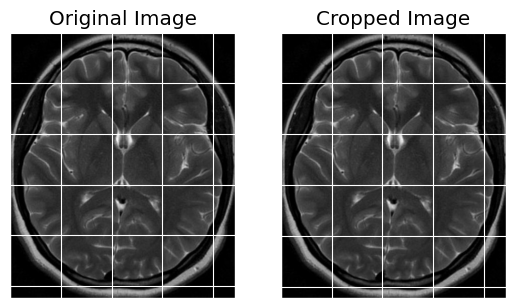

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(523, 444, 3), dtype=uint8)

In [36]:
img = cv2.imread('augmented_data/no/aug_N_1_0_366.jpg')
crop_brain_tumor(img,True)

In [37]:
folder1='augmented_data/no/'
folder2='augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img,False)
    cv2.imwrite(folder1 + filename, img)
    
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img,False)
    cv2.imwrite(folder2 + filename, img)
    

In [ ]:
#image Loading

In [38]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

def load_data(dir_list, image_size):
    X = []
    y = []

    image_width, image_height = image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            image = (image / 255.0).astype(np.float32)
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)

    # Convert lists to numpy arrays (proper indentation)
    X = np.array(X)
    y = np.array(y)

    # Shuffle the data
    X, y = shuffle(X, y)

    print(f"Number of examples: {len(X)}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    return X, y


In [39]:
augmented_path = 'augmented_data/'
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

IMAGE_WITH, IMAGE_HEIGHT =(240,240)
X,y = load_data([augmented_yes, augmented_no],(IMAGE_WITH, IMAGE_HEIGHT) )

Number of examples: 14397
X shape: (14397, 240, 240, 3)
y shape: (14397,)


## Model
(We are using VGG19 fro Transfer Learning)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_images(X, y, n=50):
    for label in [0, 1]:
        indices = np.where(y == label)[0]
        images = X[indices]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(np.ceil(n / columns_n))

        plt.figure(figsize=(20, 10))

        for i, image in enumerate(n_images, 1):
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image)  # fixed from inshow to imshow
            plt.axis('off')    # hides all ticks and labels

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}", fontsize=20)
        plt.show()


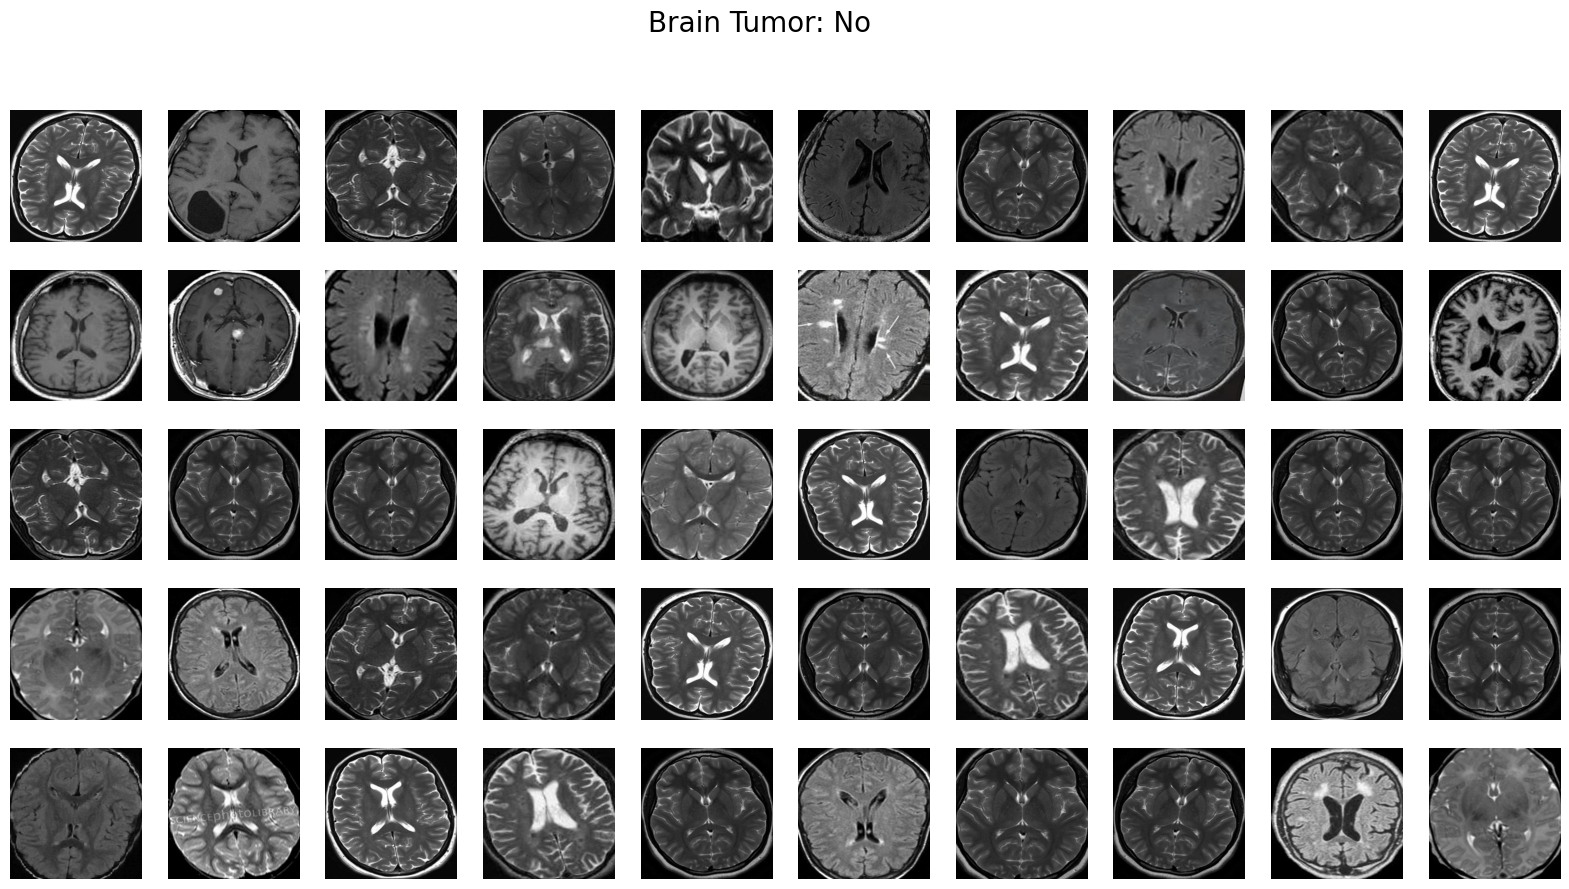

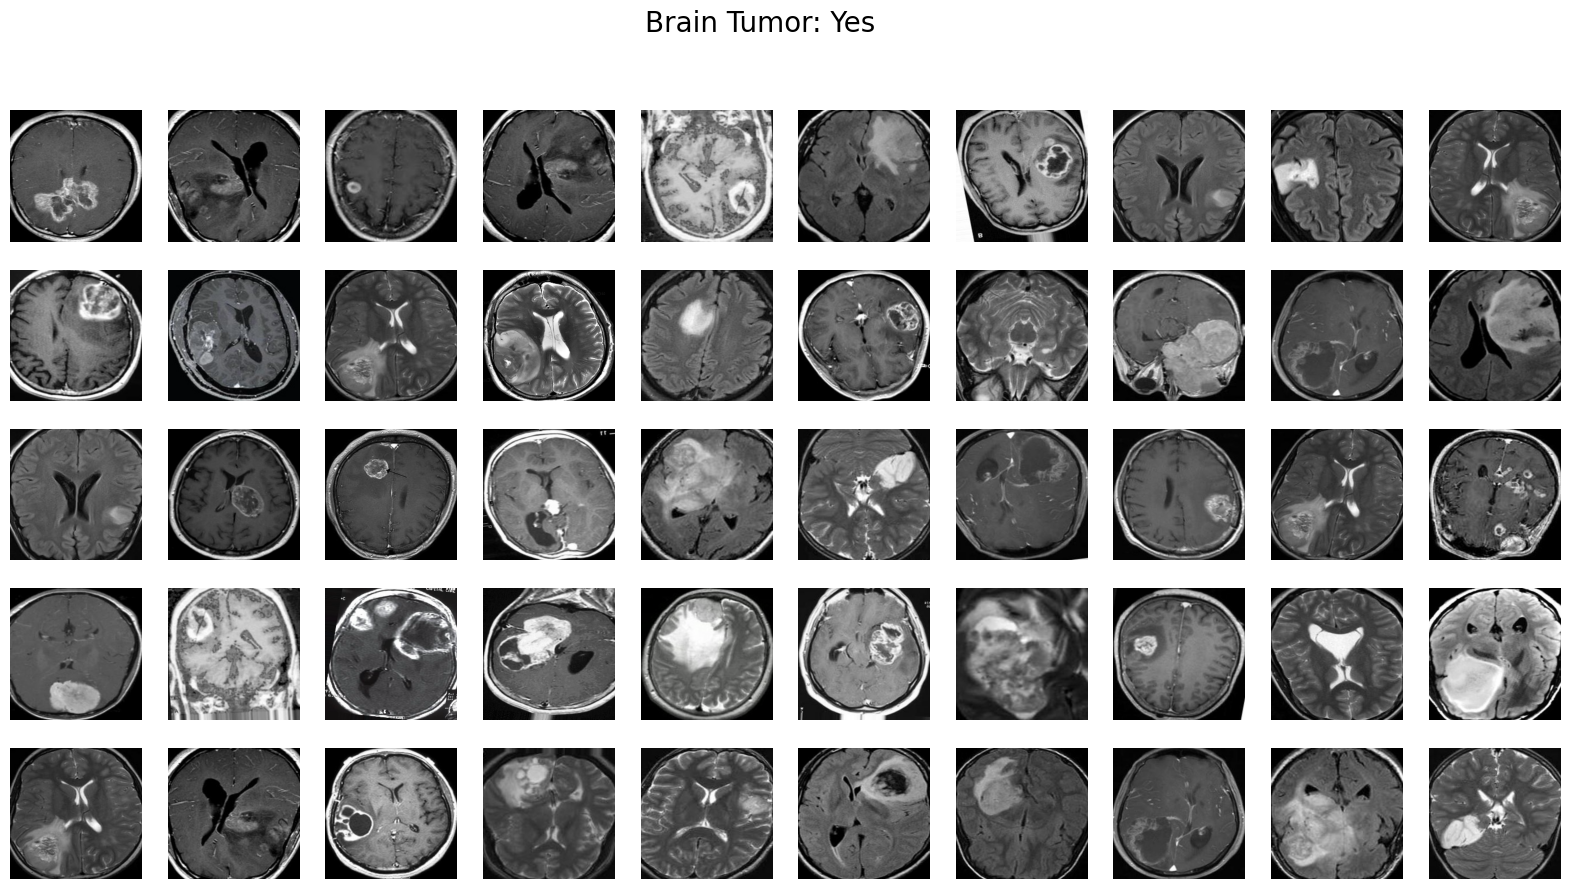

In [41]:
plot_sample_images(X,y)

In [ ]:
#Data Spliting
#Train
#Test
#Validation

In [45]:
if not os.path.isdir('tumorous_and_nontumorous'):
   base_dir = 'tumorous_and_nontumorous'
   os.mkdir(base_dir)

In [61]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
   train_dir = os.path.join(base_dir, 'train')
   os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
   test_dir = os.path.join(base_dir , 'test')
   os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
   valid_dir = os.path.join(base_dir , 'valid')
   os.mkdir(valid_dir)

In [62]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)    
    
    
    

In [63]:
infected_train_dir = os.path.join(train_dir, 'tumorous')
infected_test_dir  = os.path.join(test_dir, 'tumorous')
infected_valid_dir = os.path.join(valid_dir, 'tumorous')

os.makedirs(infected_train_dir, exist_ok=True)
os.makedirs(infected_test_dir, exist_ok=True)
os.makedirs(infected_valid_dir, exist_ok=True)

In [65]:
base_dir = 'tumorous_and_nontumorous'

train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

infected_train_dir = os.path.join(train_dir, 'tumorous')
infected_test_dir  = os.path.join(test_dir, 'tumorous')
infected_valid_dir = os.path.join(valid_dir, 'tumorous')

os.makedirs(infected_train_dir, exist_ok=True)
os.makedirs(infected_test_dir, exist_ok=True)
os.makedirs(infected_valid_dir, exist_ok=True)

healthy_train_dir = os.path.join(train_dir, 'nontumorous')
healthy_test_dir  = os.path.join(test_dir, 'nontumorous')
healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')

os.makedirs(healthy_train_dir, exist_ok=True)
os.makedirs(healthy_test_dir, exist_ok=True)
os.makedirs(healthy_valid_dir, exist_ok=True)


In [66]:
original_dataset_tumorous = os.path.join('augmented_data','yes/')

In [67]:
original_dataset_nontumorous = os.path.join('augmented_data','no/')

In [68]:
import shutil 

In [69]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(0,769):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)
    

In [70]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(769,932):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)

In [71]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(922,1095):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

In [72]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(0,693):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)
    

In [73]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(693,843):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)

In [74]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(843,989):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

In [75]:
#model Building

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [77]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                   horizontal_flip=0.4,
                   vertical_flip=0.4,
                   rotation_range=40,
                   shear_range=0.2,
                   width_shift_range=0.4,
                   height_shift_range=0.4,
                   fill_mode='nearest'
                  
                  )
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valod_data_gen = ImageDataGenerator(rescale=1.0/255)

In [78]:
train_generator=train_data_gen.flow_from_directory('tumorous_and_nontumorous/train/',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')

Found 2815 images belonging to 2 classes.


In [79]:
test_generator=train_data_gen.flow_from_directory('tumorous_and_nontumorous/test/',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')

Found 626 images belonging to 2 classes.


In [80]:
valid_generator=train_data_gen.flow_from_directory('tumorous_and_nontumorous/valid/',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')

Found 638 images belonging to 2 classes.


In [81]:
class_labels=train_generator.class_indices
class_name={value: key for (key,value) in class_labels.items()}

In [82]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [83]:
#buiding model

In [84]:
from tensorflow.keras.applications import VGG19


In [85]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=(240,240,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_01 = Model(inputs=base_model.input, outputs=output)
model_01.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [87]:
#callback
filepath= 'model.h5'
es = EarlyStopping(monitor='val_loss',verbose=1, mode='min', patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [88]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(
    learning_rate=0.0001,
    decay=1e-6,
    momentum=0.9,
    nesterov=True
)

model_01.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)


C:\Users\akash\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr],validation_data=valid_generator)


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4841 - loss: 0.7322
Epoch 1: val_loss improved from None to 0.67760, saving model to model.h5



Epoch 1: finished saving model to model.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 165s 17s/step - accuracy: 0.5047 - loss: 0.7311 - val_accuracy: 0.5627 - val_loss: 0.6776 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5489 - loss: 0.6905
Epoch 2: val_loss improved from 0.67760 to 0.66676, saving model to model.h5



Epoch 2: finished saving model to model.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 167s 18s/step - accuracy: 0.5531 - loss: 0.6772 - val_accuracy: 0.5752 - val_loss: 0.6668 - learning_rate: 1.0000e-04


In [ ]:
import matplotlib.pyplot as plt

acc = history_01.history['accuracy']
val_acc = history_01.history['val_accuracy']
loss = history_01.history['loss']
val_loss = history_01.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)

# Accuracy
ax1.plot(epochs, acc, marker='o', label='Training')
ax1.plot(epochs, val_acc, marker='o', label='Validation')
ax1.set_ylim(0,1)   # 🔥 FORCE visible scale
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Loss
ax2.plot(epochs, loss, marker='o', label='Training')
ax2.plot(epochs, val_loss, marker='o', label='Validation')
ax2.set_title("Training Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

plt.tight_layout()
plt.savefig("training_frozencnn.jpeg", dpi=120)
plt.show()


In [93]:
import os

os.makedirs("model_weights", exist_ok=True)

model_01.save_weights("model_weights/vgg19_model_01.weights.h5")
print("Weights saved!")

model_01.load_weights("model_weights/vgg19_model_01.weights.h5")

vgg_val_eval_01  = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)



Weights saved!
20/20 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.5517 - loss: 0.6740
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.5479 - loss: 0.6874


In [95]:
print(f'Validation loss: {vgg_val_eval_01[0]}')
print(f'Validation acc: {vgg_val_eval_01[1]}')
print(f'Testing loss: {vgg_test_eval_01[0]}')
print(f'Testing acc: {vgg_test_eval_01[1]}')

Validation loss: 0.6740286350250244
Validation acc: 0.5517241358757019
Testing loss: 0.6873858571052551
Testing acc: 0.5479233264923096


In [ ]:
filenames = test_generator.filenames
nb_sample = len(filenames)

vgg_prediction = model_01.predict(test_generator, steps=nb_sample, verbose = 1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

In [ ]:
# Increamental unfreezing and fine tuning

In [99]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names



['input_layer_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [102]:
model_01.save("model_weights/legacy_vgg19_model_01.h5")


In [104]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights(
    "model_weights/legacy_vgg19_model_01.h5",
    by_name=True,
    skip_mismatch=True
)

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [105]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [106]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5690 - loss: 0.7017
Epoch 1: val_loss did not improve from 0.66676
10/10 ━━━━━━━━━━━━━━━━━━━━ 175s 18s/step - accuracy: 0.5688 - loss: 0.7020 - val_accuracy: 0.5455 - val_loss: 0.6990 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5970 - loss: 0.6755
Epoch 2: val_loss did not improve from 0.66676
10/10 ━━━━━━━━━━━━━━━━━━━━ 166s 18s/step - accuracy: 0.6062 - loss: 0.6792 - val_accuracy: 0.5157 - val_loss: 0.7139 - learning_rate: 1.0000e-04


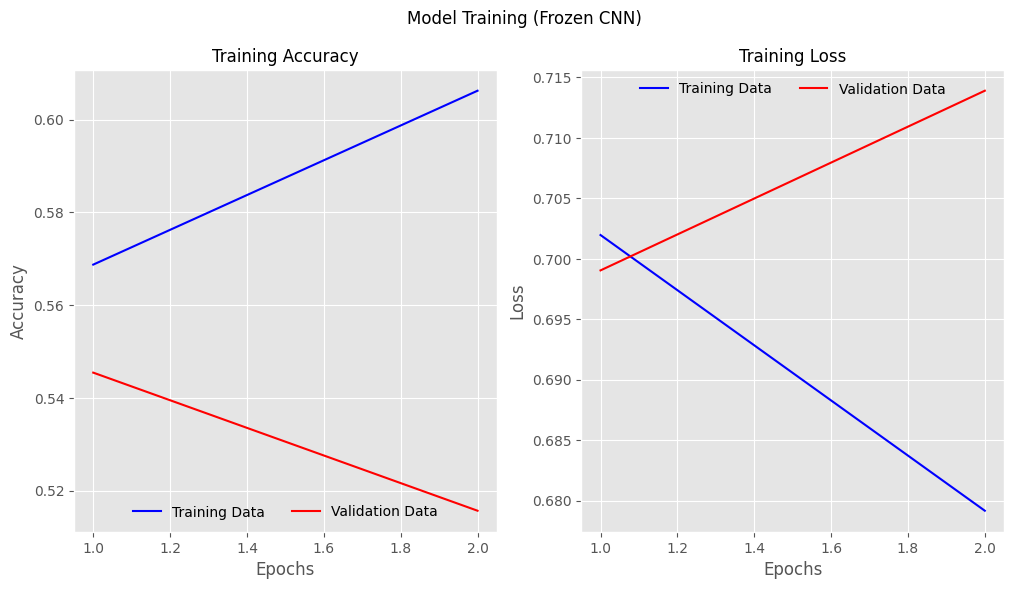

In [107]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [109]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)

In [111]:
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.5125 - loss: 0.7174
20/20 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.5383 - loss: 0.7028


In [112]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Load base model
base_model = VGG19(include_top=False, input_shape=(240,240,3))

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_03 = Model(base_model.inputs, output)

# Load fine-tuned weights correctly
model_03.load_weights("model_weights/vgg19_model_02.weights.h5")

# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze only top VGG block
for layer in base_model.layers:
    if layer.name in ['block5_conv3','block5_conv4']:
        layer.trainable = True

# Correct optimizer (NO decay)
sgd = SGD(learning_rate=1e-4, momentum=0.9, nesterov=True)

model_03.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)


In [113]:
model_03.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

In [ ]:
# history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

In [116]:
model_03.load_weights("model_weights/legacy_vgg19_model_01.h5")

vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 269s 12s/step - accuracy: 0.5768 - loss: 0.6729
20/20 ━━━━━━━━━━━━━━━━━━━━ 449s 23s/step - accuracy: 0.5335 - loss: 0.6876
